In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt # Pyplot是使matplotlib像MATLAB一樣工作的命令樣式函數的集合
import seaborn as sns
%matplotlib inline

In [4]:
dt = pd.read_csv("~/bigdata_team/data/bikeshare/train.csv")
dt_test = pd.read_csv("~/bigdata_team/data/bikeshare/test.csv")
# casual 沒註冊的使用者租借數量
# registered 已註冊的使用者租借數量
# count 總租借數量
# holiday 0:非節日 1:節日
# workingday 0:非工作日 1:工作日
# weather 1:晴朗、微量的雲 2:有霧或雲 3:小雪、小雨、暴風 4:大雨、冰雹

In [10]:
dt.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16


In [8]:
# 檢查分類資料是否合乎規範
print(dt['season'].unique())
print(dt['holiday'].unique())
print(dt['workingday'].unique())

[1 2 3 4]
[0 1]
[0 1]


In [11]:
# 將資料以固定格式轉換，留下年分、月份、星期與小時
dt['datetime'] = pd.to_datetime(dt['datetime'],format='%Y-%m-%d %H:%M:%S')
dt_test['datetime'] = pd.to_datetime(dt['datetime'],format='%Y-%m-%d %H:%M:%S')

In [12]:
dt.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16


In [14]:
# 留下年月時
dt['year'] = dt['datetime'].dt.year
dt['month'] = dt['datetime'].dt.month
dt['hour'] = dt['datetime'].dt.hour
dt['dayofweek'] = dt['datetime'].dt.dayofweek

dt_test['year'] = dt_test['datetime'].dt.year
dt_test['month'] = dt_test['datetime'].dt.month
dt_test['hour'] = dt_test['datetime'].dt.hour
dt_test['dayofweek'] = dt_test['datetime'].dt.dayofweek

<AxesSubplot:xlabel='count', ylabel='Density'>

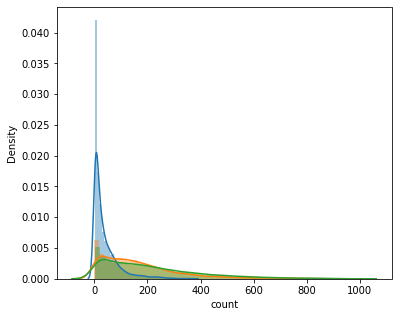

In [62]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(6, 5)
sns.distplot(dt["casual"],ax=axes)
sns.distplot(dt["registered"],ax=axes)
sns.distplot(dt["count"],ax=axes)

In [64]:
dt['log_casual'] = np.log(dt['casual'])
dt['log_registered'] = np.log(dt['registered'])
dt['log_count'] = np.log(dt['count'])

In [65]:
# 我加：casual=0會造成log_cas=-inf，後面模型會出錯，所以刪了
dt = dt[dt['casual']!=0]
dt = dt[dt['registered']!=0]
dt = dt[dt['count']!=0]

<AxesSubplot:xlabel='log_count', ylabel='Density'>

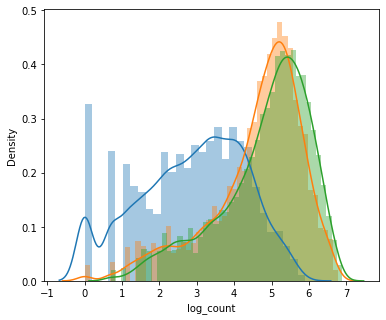

In [66]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(6, 5)
sns.distplot(dt["log_casual"],ax=axes)
sns.distplot(dt["log_registered"],ax=axes)
sns.distplot(dt["log_count"],ax=axes)

# 取log後可以看到除了 casual 外，其他資料正常很多，推測是因為未註冊的用戶較不穩定